## Toxic Comment Classification

Study of negative online behaviour. We need to be able to classify text and discern between different levels of toxicity and disrespectful behaviour - such as like threats, obscenity, insults, and identity-based hate etc

In [1]:
import numpy as np
import pandas as pd
from IPython.display import display

raw_data = pd.read_csv('../data/train.csv', encoding="utf-8")
display(raw_data.tail())

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0
159570,fff46fc426af1f9a,"""\nAnd ... I really don't think you understand...",0,0,0,0,0,0


### Exploring the text data

We explore the nature of the text data here

In [2]:
print(raw_data.iloc[0, 1])

Explanation
Why the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27


In [3]:
print(raw_data.iloc[1, 1])

D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2016 (UTC)


In [4]:
print(raw_data.iloc[2, 1])

Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info.


In [5]:
toxic_df = raw_data[raw_data['toxic'] > 0]
display(toxic_df.head())

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
12,0005c987bdfc9d4b,Hey... what is it..\n@ | talk .\nWhat is it......,1,0,0,0,0,0
16,0007e25b2121310b,"Bye! \n\nDon't look, come or think of comming ...",1,0,0,0,0,0
42,001810bf8c45bf5f,You are gay or antisemmitian? \n\nArchangel WH...,1,0,1,0,1,1
43,00190820581d90ce,"FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!",1,0,1,0,1,0


In [6]:
print(toxic_df.iloc[0, 1])

COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK


In [7]:
print(toxic_df.iloc[1, 1])

Hey... what is it..
@ | talk .
What is it... an exclusive group of some WP TALIBANS...who are good at destroying, self-appointed purist who GANG UP any one who asks them questions abt their ANTI-SOCIAL and DESTRUCTIVE (non)-contribution at WP?

Ask Sityush to clean up his behavior than issue me nonsensical warnings...


In [8]:
print(toxic_df.iloc[10, 1])

Why can't you believe how fat Artie is? Did you see him on his recent appearence on the Tonight Show with Jay Leno? He looks absolutely AWFUL! If I had to put money on it, I'd say that Artie Lange is a can't miss candidate for the 2007 Dead pool!   

  
Kindly keep your malicious fingers off of my above comment, . Everytime you remove it, I will repost it!!!


Having a look at word distributions...and converting to a list data structure with the target list

In [9]:
import nltk
import random
import pickle
import re
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

def word_process(some_text):
    stop_words = set(stopwords.words('english'))    
    words = word_tokenize(some_text.lower())
    
    filtered_words = []
    for w in words:
        if w not in stop_words:
            filtered_words.append(w)
            
    return filtered_words

def parse_raw():
    documents = []
    for index, row in raw_data.iterrows():
        text = row['comment_text']
        words = word_process(text)
        target = list(raw_data.iloc[index,2:])
        
        documents.append((words, target))

    return documents

parsed_text = parse_raw()

print(parsed_text[0])
    

([u'explanation', u'edits', u'made', u'username', u'hardcore', u'metallica', u'fan', u'reverted', u'?', u"n't", u'vandalisms', u',', u'closure', u'gas', u'voted', u'new', u'york', u'dolls', u'fac', u'.', u'please', u"n't", u'remove', u'template', u'talk', u'page', u'since', u"'m", u'retired', u'now.89.205.38.27'], [0, 0, 0, 0, 0, 0])


Let's take a look at some most commonly occuring words...

In [10]:
# [(['we', 'have', 'list'], [0, 1, 0])]

def find_all_words():
    words = []
    for content, target in parsed_text:
        for w in content:
            if w.isalpha() == True:
                words.append(w)
            
    return words
    
all_words = find_all_words()

In [11]:
all_words = nltk.FreqDist(all_words)

print(all_words['fuck'])

print(list(all_words.keys())[:100])

9370
[u'fawn', u'anusance', u'tsukino', u'gai', u'beetlefart', u'scheuring', u'gear\xf3id', u'bailyite', u'sowell', u'sonja', u'comres', u'devonians', u'vani', u'woods', u'spiders', u'gavan', u'hanging', u'ultimatley', u'woody', u'trawling', u'avsforum', u'comically', u'kalmar', u'localized', u'nordisk', u'regularize', u'disobeying', u'conrtibs', u'priorend', u'rigas', u'eastasia', u'lenca', u'chatter', u'jairam', u'acurately', u'sociopathy', u'supasoldier', u'gab', u'\u6cb3', u'refunding', u'nibelhiem', u'rickman', u'tenino', u'raasleela', u'hahahah', u'\u0634\u0643\u0644\u0647\u0627', u'discribed', u'sidestrand', u'pigment', u'cofinality', u'occops', u'caryopsis', u'snitsky', u'panchakam', u'bringing', u'petras', u'prizing', u'jrpg', u'tcby', u'wcfl', u'wooded', u'distributerd', u'weltherweight', u'timoc', u'kangema', u'wooden', u'kacian', u'wednesday', u'viable', u'circuitry', u'crotch', u'elgar', u'amplifications', u'loblaws', u'syberwolff', u'shows', u'immunities', u'dofficult', u

In [12]:
print(all_words['good'])
print(all_words.most_common(50))

12572
[(u'article', 56859), (u'page', 45656), (u'wikipedia', 45418), (u'talk', 35060), (u'would', 30798), (u'please', 29607), (u'one', 28336), (u'like', 27718), (u'see', 21498), (u'also', 20574), (u'think', 20037), (u'know', 18969), (u'people', 18291), (u'edit', 17627), (u'articles', 16424), (u'use', 16330), (u'may', 15557), (u'time', 15352), (u'thanks', 13548), (u'user', 13451), (u'even', 13394), (u'get', 13359), (u'make', 12939), (u'could', 12792), (u'good', 12572), (u'information', 12056), (u'want', 11598), (u'well', 11443), (u'sources', 11192), (u'way', 11145), (u'name', 11000), (u'deletion', 10878), (u'first', 10774), (u'help', 10618), (u'pages', 10607), (u'new', 10511), (u'wp', 10481), (u'source', 10261), (u'image', 10226), (u'need', 10188), (u'go', 10183), (u'say', 10081), (u'section', 9991), (u'editing', 9908), (u'edits', 9860), (u'thank', 9817), (u'made', 9567), (u'many', 9531), (u'much', 9424), (u'fuck', 9370)]


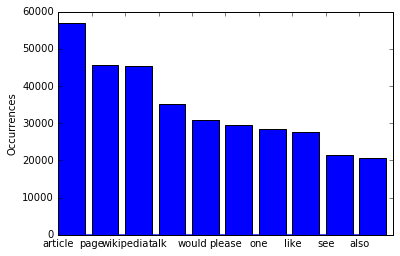

In [13]:
import matplotlib.pyplot as plt                        
%matplotlib inline

all_words_top_50 = all_words.most_common(50)[:10]

x_pos = np.arange(len(zip(*all_words_top_50)[0]))

plt.plot(x_pos)
plt.bar(x_pos, zip(*all_words_top_50)[1])
plt.xticks(x_pos, zip(*all_words_top_50)[0])
plt.ylabel('Occurrences')
plt.show()


In [14]:
def find_all_words_toxic():
    words = []
    comparison = [0, 0, 0, 0, 0, 0]
    for content, target in parsed_text:
        if target != comparison:
            for w in content:
                if w.isalpha() == True:
                    words.append(w)
            
    return words
    
toxic_words = find_all_words_toxic()

print(toxic_words[:30])

[u'cocksucker', u'piss', u'around', u'work', u'hey', u'talk', u'exclusive', u'group', u'wp', u'talibans', u'good', u'destroying', u'purist', u'gang', u'one', u'asks', u'questions', u'abt', u'destructive', u'non', u'wp', u'ask', u'sityush', u'clean', u'behavior', u'issue', u'nonsensical', u'warnings', u'bye', u'look']


[(u'fuck', 9293), (u'like', 3775), (u'shit', 3646), (u'wikipedia', 3618), (u'nigger', 3296), (u'suck', 3239), (u'fucking', 3232), (u'go', 2953), (u'ass', 2939), (u'u', 2677), (u'hate', 2636), (u'get', 2434), (u'page', 2352), (u'know', 2348), (u'gay', 2245), (u'die', 2140), (u'people', 2055), (u'faggot', 2019), (u'fat', 1977), (u'moron', 1878), (u'bitch', 1817), (u'hi', 1712), (u'one', 1664), (u'article', 1552), (u'cunt', 1550), (u'stop', 1494), (u'talk', 1482), (u'stupid', 1474), (u'sucks', 1444), (u'think', 1394), (u'user', 1385), (u'pig', 1352), (u'jew', 1349), (u'want', 1305), (u'would', 1274), (u'dick', 1235), (u'wiki', 1185), (u'time', 1170), (u'bullshit', 1156), (u'block', 1143), (u'even', 1135), (u'life', 1120), (u'dont', 1070), (u'asshole', 1051), (u'make', 1050), (u'wanker', 1035), (u'see', 1034), (u'edit', 1031), (u'please', 1029), (u'right', 1018)]


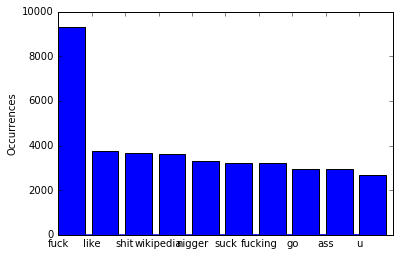

In [15]:
toxic_words = nltk.FreqDist(toxic_words)

toxic_words_top_50 = toxic_words.most_common(50)

print(toxic_words_top_50)

toxic_words_top_50 = toxic_words.most_common(50)[:10]

x_pos = np.arange(len(zip(*toxic_words_top_50)[0]))

plt.plot(x_pos)
plt.bar(x_pos, zip(*toxic_words_top_50)[1])
plt.xticks(x_pos, zip(*toxic_words_top_50)[0])
plt.ylabel('Occurrences')
plt.show()


Over here we build a feature extractor, then split into training and testing sets

In [2]:
# should we keep shuffling the data?
# use #TF-IDF, #Bag of words, #Doc2Vec, #word2vec, first try with unigrams, then bigrams and then trigrams
# Use naive bayes on those feature extractors
import pickle
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split

class FeatureExtractor(object):
    def __init__(self, dataframe, ngram):
        self._dataframe = dataframe
        self._ngram = ngram
        
    def prepare_data(self):
        documents = []
        targets = []
        for index, row in self._dataframe.iterrows():
            text = row['comment_text']
            # target = list(self._dataframe.iloc[index,2:])
            documents.append(text)
            if int(row['toxic']) == 1:
                targets.append(1)
            else:
                targets.append(0)
            
        return documents, np.array(targets)
    
    def train_test_split(self, docs, targets):
        split_point = int(round(len(docs) * 0.75, 0))
        return docs[:split_point], targets[:split_point], docs[split_point:], targets[split_point:]
        
    def vectorize_tf_idf(self):
        count_vectorizer = CountVectorizer()
        docs, targets = self.prepare_data()
                
        freq_term_matrix = count_vectorizer.fit_transform(docs)        
        tfidf = TfidfTransformer(norm="l2")
        tfidf.fit(freq_term_matrix)
        tf_idf_matrix = tfidf.transform(freq_term_matrix)
        return tf_idf_matrix.todense(), targets
        

The scikit-learn version is 0.19.0.


In [3]:
feature_extractor = FeatureExtractor(raw_data, 1)
features, targets = feature_extractor.vectorize_tf_idf()

tfidf_features_train_1, tfidf_targets_train_1, tfidf_features_test_1, tfidf_targets_test_1 = feature_extractor.train_test_split(features, targets)        
print('done processing')

done processing


In [4]:
'''
with open('pickles/tfidf_dataset_1', 'wb') as file_pi:
        pickle.dump({'X_train':tfidf_features_train_1, 'X_test':tfidf_targets_train_1, 
                     'y_train':tfidf_features_test_1, 'y_test':tfidf_targets_test_1}, file_pi)

print('done')
'''
print(features.shape)
print(targets.shape)
print(targets[:30])

(159571, 189765)
(159571,)
[0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [5]:
# Try with one type of classifer first to see the results
# use Naive Bayes first
import pickle
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

class ToxicCommentClassifier(object):
    def __init__(self, model, X_train, X_test, y_train, y_test):
        self._model = model
        self._classifier = None
        self._X_train = X_train
        self._X_test = X_test
        self._y_train = y_train
        self._y_test = y_test
        
    def fit_classifier(self):
        print('fit')
        self._classifier = self._model()
        self._classifier.fit(self._X_train[:1000], self._X_test[:1000])
        print('done fitting')
        
    def predict(self, X):
        prediction = self._classifier.predict(X)
        return prediction
        
    def fine_tune(self):
        # perform some gridsearch here
        return None
    
    def evaluate(self):
        print('evaluate')
        predictions = []
        for y in self._y_train[:250]:
            result = self.predict(y)
            predictions.append(result)
        
        print(predictions[:30])
        
        # recall = recall_score(self._y_test, np.array(predictions).astype(int), average='weighted')
        # precision = precision_score(self._y_test, np.array(predictions).astype(int), average='weighted')
        # f1 = f1_score(self._y_test, np.array(predictions).astype(int), average='weighted')
        
        return accuracy_score(self._y_test[:250], predictions)
        

In [6]:
from sklearn.naive_bayes import GaussianNB

toxic_classifier = ToxicCommentClassifier(GaussianNB, tfidf_features_train_1, tfidf_targets_train_1, tfidf_features_test_1, tfidf_targets_test_1)
toxic_classifier.fit_classifier()
accuracy = toxic_classifier.evaluate()

#print(recall)
#print(precision)
print(accuracy)

# TODO: this has become a binary classification problem, is the comment toxic or not
# Need to do partial fitting since the data set is too huge to train, it crashes the kernel

fit
done fitting
evaluate
[array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([1]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0])]
0.904
